<a href="https://colab.research.google.com/github/foryoudrizzle14/AI-/blob/main/6%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#고객행동예측
User Churn Model in E-Commerce Retail

데이터 : https://www.kaggle.com/datasets/fridrichmrtn/user-churn-dataset

원본 : https://www.kaggle.com/datasets/retailrocket/ecommerce-dataset

논문 : https://editorial.upce.cz/1804-8048/30/1/1478

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cust_data = pd.read_csv('/content/drive/MyDrive/강의자료/9기A반(딥러닝)/week6/ecom-user-churn-data.csv')

In [ ]:
cust_data.head()

,visitorid,ses_rec,ses_rec_avg,ses_rec_sd,ses_rec_cv,user_rec,ses_n,ses_n_r,int_n,int_n_r,...,int_cat16_n,int_cat17_n,int_cat18_n,int_cat19_n,int_cat20_n,int_cat21_n,int_cat22_n,int_cat23_n,int_cat24_n,target_class
0,89,23.0,16.0,0.0,0.0,39.0,2.0,0.051282,3.0,1.500000,...,0,0,0,0,3,0,0,0,0,1
1,251,23.0,61.0,0.0,0.0,85.0,2.0,0.023529,2.0,1.000000,...,0,0,0,0,0,0,1,0,0,1
2,270,14.0,0.1,0.3,3.0,21.0,11.0,0.523810,13.0,1.181818,...,0,0,0,0,0,0,13,0,0,1
3,298,11.0,13.0,0.0,0.0,24.0,2.0,0.083333,4.0,2.000000,...,0,0,0,3,1,0,0,0,0,1
4,474,16.0,26.0,0.0,0.0,43.0,2.0,0.046512,2.0,1.000000,...,2,0,0,0,0,0,0,0,0,1


In [ ]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49358 entries, 0 to 49357
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   visitorid      49358 non-null  int64  
 1   ses_rec        49358 non-null  float64
 2   ses_rec_avg    49358 non-null  float64
 3   ses_rec_sd     49358 non-null  float64
 4   ses_rec_cv     49358 non-null  float64
 5   user_rec       49358 non-null  float64
 6   ses_n          49358 non-null  float64
 7   ses_n_r        49358 non-null  float64
 8   int_n          49358 non-null  float64
 9   int_n_r        49358 non-null  float64
 10  tran_n         49358 non-null  float64
 11  tran_n_r       49358 non-null  float64
 12  rev_sum        49358 non-null  float64
 13  rev_sum_r      49358 non-null  float64
 14  major_spend_r  49358 non-null  float64
 15  int_cat_n_avg  49358 non-null  float64
 16  int_itm_n_avg  49358 non-null  float64
 17  ses_mo_avg     49358 non-null  float64
 18  ses_mo

In [ ]:
cust_data.describe()

,visitorid,ses_rec,ses_rec_avg,ses_rec_sd,ses_rec_cv,user_rec,ses_n,ses_n_r,int_n,int_n_r,...,int_cat16_n,int_cat17_n,int_cat18_n,int_cat19_n,int_cat20_n,int_cat21_n,int_cat22_n,int_cat23_n,int_cat24_n,target_class
count,4.935800e+04,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,...,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000
mean,7.072986e+05,15.454840,11.231611,2.711961,-0.020100,33.822947,3.366445,0.172372,6.716277,1.720975,...,0.955792,0.773714,0.382977,0.732424,0.503343,0.447020,2.102577,0.038130,0.099579,0.885591
std,4.072098e+05,9.184645,18.162743,6.583917,0.917701,25.237703,7.380573,0.372614,38.528882,1.455885,...,6.086722,5.003517,4.569604,4.977989,3.259194,3.873684,16.273213,0.593681,1.135149,0.318311
min,3.700000e+01,0.000000,0.000000,0.000000,-1.000000,0.000000,2.000000,-1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.532920e+05,7.000000,0.000000,0.000000,-1.000000,16.000000,2.000000,0.060606,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,7.100910e+05,16.000000,2.250000,0.000000,0.000000,26.000000,2.000000,0.090909,3.000000,1.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.060355e+06,23.000000,14.250000,1.000000,0.638646,46.000000,3.000000,0.166667,6.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000
max,1.407573e+06,31.000000,99.000000,47.500000,11.525121,99.000000,475.000000,18.000000,5549.000000,59.000000,...,576.000000,445.000000,481.000000,564.000000,317.000000,420.000000,2282.000000,54.000000,105.000000,1.000000


target 확인

In [ ]:
cust_data['target_class'].unique() # 1 : churn

array([1, 0])

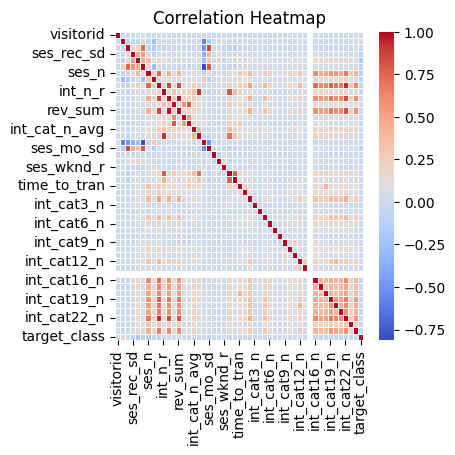

In [ ]:
corr = cust_data.corr()
plt.figure(figsize=(4,4))
sns.heatmap(corr,  cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

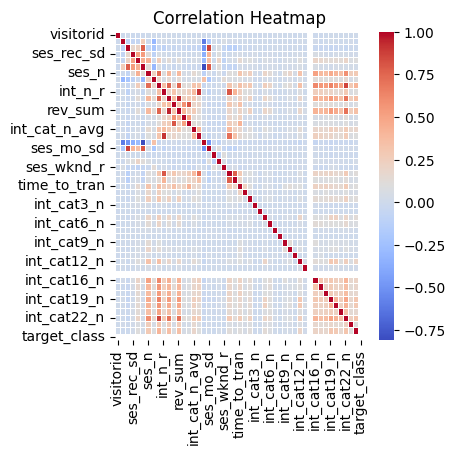

In [ ]:
corr = cust_data[cust_data['target_class']==1].corr()
plt.figure(figsize=(4,4))
sns.heatmap(corr,  cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

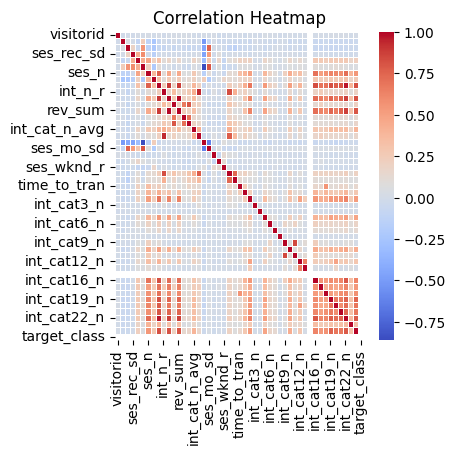

In [ ]:
corr = cust_data[cust_data['target_class']==0].corr()
plt.figure(figsize=(4,4))
sns.heatmap(corr,  cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
cust_data['visitorid'].nunique()

49358

In [ ]:
cust_data.groupby('target_class')['target_class'].count()

target_class
0     5647
1    43711
Name: target_class, dtype: int64

In [ ]:
5647/(5647+43711)

0.11440901171036104

구매 : 0->1
이탈 : 1->0

In [ ]:
cust_data['target_class'] = cust_data['target_class']*-1+1

In [ ]:
cust_data.groupby('target_class')['target_class'].count()

target_class
0    43711
1     5647
Name: target_class, dtype: int64

Train_Test_Valid_Split

In [ ]:
def split_data(data, frac):
  train_df = data.sample(axis=0, frac=frac)
  test_df = data[data.index.isin(train_df.index)==False]
  return train_df, test_df

In [ ]:
pos_df = cust_data[cust_data['target_class']==1]
neg_df = cust_data[cust_data['target_class']==0]

In [ ]:
neg_df.shape, pos_df.shape

((43711, 49), (5647, 49))

In [ ]:
train_df1, test_df1 = split_data(pos_df, 0.7)
test_df1, valid_df1 = split_data(test_df1, 0.7)
train_df0, test_df0 = split_data(neg_df, 0.7)
test_df0, valid_df0 = split_data(test_df0, 0.7)

In [ ]:
train_df = pd.concat([train_df1, train_df0])
valid_df = pd.concat([valid_df1, valid_df0])
test_df = pd.concat([test_df1, test_df0])

train_df.shape, valid_df.shape, test_df.shape

((34551, 49), (4442, 49), (10365, 49))

In [ ]:
print(train_df.groupby('target_class')['target_class'].count())
print(test_df.groupby('target_class')['target_class'].count())
print(valid_df.groupby('target_class')['target_class'].count())

target_class
0    30598
1     3953
Name: target_class, dtype: int64
target_class
0    9179
1    1186
Name: target_class, dtype: int64
target_class
0    3934
1     508
Name: target_class, dtype: int64


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim

In [ ]:
class cust_dataset(Dataset):
  def __init__(self, data):
    self.data = data.drop('visitorid', axis = 1)
    self.X = torch.tensor(self.data.drop('target_class', axis=1).to_numpy(), dtype=torch.float)
    self.y = torch.tensor(self.data['target_class'].to_numpy(), dtype=torch.float).reshape(-1,1)

  def __len__(self):
    return self.X.shape[0]

  def __getitem__(self,i):
    return self.X[i], self.y[i]



In [ ]:
train_dataset = cust_dataset(train_df)
validation_dataset = cust_dataset(valid_df)
test_dataset = cust_dataset(test_df)

In [ ]:
train_dataset.__len__(), validation_dataset.__len__(), test_dataset.__len__()


(34551, 4442, 10365)

In [ ]:
train_dataset.__getitem__(0)

(tensor([ 7.0000,  1.7907,  4.4698,  2.4961, 96.0000, 44.0000,  0.4583, 52.0000,
          1.1818,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  1.1818,
          6.2727,  0.9490, 12.2273,  2.5505,  0.0000,  2.0682,  1.7500, -1.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000, 24.0000,  0.0000, 28.0000,  0.0000,  0.0000]),
 tensor([1.]))

## Sampler

In [ ]:
from torch.utils.data.sampler import WeightedRandomSampler

def class_imbalance_sampler(labels):
    class_count = torch.bincount(labels.squeeze())
    class_weighting = 1. / class_count
    sample_weights = class_weighting[labels]
    sampler = WeightedRandomSampler(sample_weights, len(labels))
    return sampler



In [ ]:
labels = train_dataset.y.int().squeeze()

In [ ]:
class_count = torch.bincount(torch.tensor(train_df['target_class'].to_numpy()))
class_weighting = 1. / class_count

In [ ]:
sample_weights = class_weighting[labels]
sample_weights

tensor([2.5297e-04, 2.5297e-04, 2.5297e-04,  ..., 3.2682e-05, 3.2682e-05,
        3.2682e-05])

In [ ]:
sample_weights.size()

torch.Size([34551])

In [ ]:
train_sampler = class_imbalance_sampler(train_dataset.y.int().squeeze())

In [ ]:
train_sampler.num_samples

34551

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=128, sampler=train_sampler, drop_last=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=64, drop_last=True) # 평가시에는 Sampler 사용X
test_dataloader = DataLoader(test_dataset, batch_size=64, drop_last=True) # 평가시에는 Sampler 사용X

In [ ]:
class ChurnNet(nn.Module):
    def __init__(self):
        super(ChurnNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(47, 128),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)


In [ ]:
model = ChurnNet()
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5) # torch는 L2만 있음
criterion = nn.BCELoss()


In [ ]:
# 학습 함수
def train(model, criterion, optimizer, loader):
    model.train()
    for data, target in loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

# 평가 함수
def evaluate(model, loader):
    model.eval()
    total_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in loader:
            output = model(data)
            total_loss += criterion(output, target).item()
            pred = torch.tensor(output>0.5)
            correct += pred.eq(target.view_as(pred)).sum().item()
    return total_loss / len(loader.dataset), correct / len(loader.dataset)

def train_test(model, criterion, optimizer, train_loader, test_loader, epoch):

  train_losses = []
  test_losses = []
  train_acces = []
  test_acces = []
  # 학습 및 평가
  for epoch in range(epoch):
      train(model, criterion, optimizer, train_loader)
      train_loss, train_acc = evaluate(model, train_loader)
      test_loss, test_acc = evaluate(model, test_loader)
      train_losses.append(train_loss)
      test_losses.append(test_loss)
      train_acces.append(train_acc)
      test_acces.append(test_acc)
      print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Test Loss: {test_loss:.4f}, Valid Acc: {test_acc:.4f}')

  return train_losses, test_losses, train_acces, test_acces


In [ ]:
def plot_acc(train_acces, test_acces):
  plt.plot(train_acces, label='train_acc')
  plt.plot(test_acces, label='valid_acc')
  plt.xlabel('Epoch')
  plt.ylabel('acc')
  plt.title('Training and Test acc')
  plt.legend()
  plt.show()

In [ ]:
def plot_loss(train_losses, test_losses):
  plt.plot(train_losses, label='Training Loss')
  plt.plot(test_losses, label='Valid Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Training and Test Loss')
  plt.legend()
  plt.show()

<ipython-input-59-f9f17d62bd95>:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = torch.tensor(output>0.5)


Epoch 1, Train Loss: 0.0188, Train Acc: 0.6787, Test Loss: 0.0646, Valid Acc: 0.6909
Epoch 2, Train Loss: 0.0183, Train Acc: 0.6788, Test Loss: 0.0657, Valid Acc: 0.6628
Epoch 3, Train Loss: 0.0190, Train Acc: 0.6774, Test Loss: 0.0651, Valid Acc: 0.6869
Epoch 4, Train Loss: 0.0199, Train Acc: 0.6796, Test Loss: 0.0660, Valid Acc: 0.6576
Epoch 5, Train Loss: 0.0194, Train Acc: 0.6815, Test Loss: 0.0647, Valid Acc: 0.6875
Epoch 6, Train Loss: 0.0194, Train Acc: 0.6795, Test Loss: 0.0660, Valid Acc: 0.6923
Epoch 7, Train Loss: 0.0188, Train Acc: 0.6823, Test Loss: 0.0645, Valid Acc: 0.7006
Epoch 8, Train Loss: 0.0195, Train Acc: 0.6772, Test Loss: 0.0651, Valid Acc: 0.7087
Epoch 9, Train Loss: 0.0183, Train Acc: 0.6827, Test Loss: 0.0647, Valid Acc: 0.6783
Epoch 10, Train Loss: 0.0186, Train Acc: 0.6801, Test Loss: 0.0649, Valid Acc: 0.6936
Epoch 11, Train Loss: 0.0196, Train Acc: 0.6753, Test Loss: 0.0652, Valid Acc: 0.6621
Epoch 12, Train Loss: 0.0186, Train Acc: 0.6845, Test Loss: 0.0

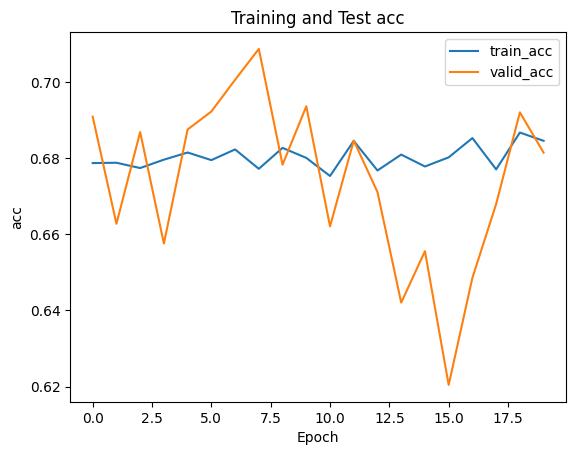

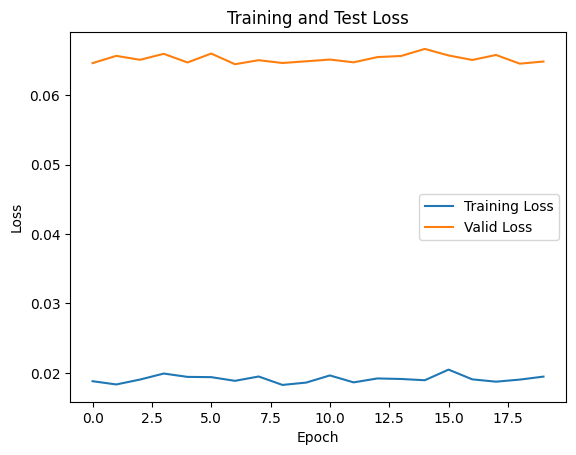

In [ ]:
epoch = 20

train_losses, test_losses, train_acces, test_acces = train_test(model, criterion, optimizer, train_dataloader, validation_dataloader, epoch)
plot_acc(train_acces, test_acces)
plot_loss(train_losses, test_losses)

TEST 데이터 성능평가

In [ ]:
!pip install torcheval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.2/179.2 kB 1.7 MB/s eta 0:00:00


In [ ]:
from torcheval.metrics.functional import binary_confusion_matrix
from torcheval.metrics.functional import binary_f1_score

In [ ]:
prediction = torch.empty((0,1))
targets = torch.empty((0,1))
for X, target in test_dataloader:
    pred = model(X)
    prediction = torch.cat((prediction, pred), dim = 0)
    targets = torch.cat((targets, target), dim = 0)

In [ ]:
prediction

tensor([[0.1616],
        [0.5946],
        [0.1475],
        ...,
        [0.2821],
        [1.0000],
        [0.1784]], grad_fn=<CatBackward0>)

In [ ]:
binary_pred = (prediction>0.5).int().squeeze()
targets = targets.squeeze()

In [ ]:
binary_pred

tensor([0, 1, 0,  ..., 0, 1, 0], dtype=torch.int32)

In [ ]:
targets

tensor([1., 1., 1.,  ..., 0., 0., 0.])

In [ ]:
binary_confusion_matrix(input=binary_pred.int(), target=targets.int())

tensor([[6365, 2753],
        [ 415,  771]], dtype=torch.int32)

In [ ]:
recall = 771/(415+771)

In [ ]:
precision = 771/(2753+771)

f1스코어

In [ ]:
f1_score = (2*recall*precision)/(recall+precision) # 조화평균
print(f1_score)

0.3273885350318471


#마케팅 캠페인 전략
마케팅 수행 적중률 계산

구매가망모형

In [ ]:
prediction.shape

torch.Size([10304, 1])

In [ ]:
prediction.squeeze().sort(descending =True)

torch.return_types.sort(
values=tensor([1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 5.9624e-04, 4.5129e-04,
        1.0763e-04], grad_fn=<SortBackward0>),
indices=tensor([7473, 7422, 7448,  ..., 8719, 7483, 7234]))

In [ ]:
sorted, indice = prediction.squeeze().sort(descending =True)

In [ ]:
decile = int(sorted.size()[0]/10)
decile

1030

In [ ]:
decile_prob = []

for i in range(10):
  begin = i*decile
  end = (i+1)*decile

  if i == 9:
    end = sorted.size()[0]
  print(begin, end)
  decile_prob.append(targets[indice[begin:end]].sum()/decile)

0 1030
1030 2060
2060 3090
3090 4120
4120 5150
5150 6180
6180 7210
7210 8240
8240 9270
9270 10304


In [ ]:
decile_prob

[tensor(0.3369),
 tensor(0.1845),
 tensor(0.1573),
 tensor(0.1320),
 tensor(0.0942),
 tensor(0.0913),
 tensor(0.0447),
 tensor(0.0447),
 tensor(0.0398),
 tensor(0.0262)]